In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion, Pipeline

from funcs import classify_sentiment
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df=pd.read_csv("sample.csv")
scaler=MinMaxScaler(feature_range=(-1,1))
df['normalized_rating']=scaler.fit_transform(df[['rating']])
df['score']=df.apply(lambda row : (row['normalized_rating']+row['polarity']*0.5),axis=1)
df['sentiment']=df['score'].apply(lambda x : classify_sentiment(x))





# **5. Feature Engineering:**

In [4]:
#Bag of Words(BoW)
# df=pd.read_csv("sample.csv")
# Check for null values in the 'eview' column
if df['review'].isnull().any():
    print("Null values found in 'review' column! Replacing with empty strings.")
    df['review'] = df['review'].fillna('')

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the tokenized reviews to BoW matrix
bow_matrix = vectorizer.fit_transform(df['review'])

# Convert to DataFrame (optional)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the BoW DataFrame
display(bow_df.head())

Null values found in 'review' column! Replacing with empty strings.


,00,000,01,02,03,04,05,05101,08,0s,...,zoom,zoomie,zuniga,zyrtec,zzz,ásperos,únicamente,útil,útile,ごくぼそ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Term Frequency-Inverse Document Frequency (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the tokenized reviews to TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['review'])

# Convert to DataFrame (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
display(tfidf_df.head())

,00,000,01,02,03,04,05,05101,08,0s,...,zoom,zoomie,zuniga,zyrtec,zzz,ásperos,únicamente,útil,útile,ごくぼそ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Logistic Regression**

#### 1.Features: `rating`, `polarity`

In [6]:
# Prepare features (X) and target (y)
X = df[[ 'subjectivity', 'score']]
y = df['sentiment']
display(y)
# Split the data into 20-80 train-test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
lr_cf_accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", lr_cf_accuracy)
# print(conf_matrix)

print("Classification Report:\n", report)

0                positive
1                negative
2       strongly positive
3       strongly positive
4       strongly positive
              ...        
9995    strongly positive
9996    strongly negative
9997             negative
9998    strongly positive
9999    strongly positive
Name: sentiment, Length: 10000, dtype: object

Accuracy: 0.9806666666666667
Classification Report:
                    precision    recall  f1-score   support

         negative       0.94      0.89      0.91       166
          neutral       1.00      0.82      0.90        28
         positive       0.87      0.85      0.86       162
strongly negative       0.99      0.98      0.99       501
strongly positive       0.99      1.00      0.99      2143

         accuracy                           0.98      3000
        macro avg       0.96      0.91      0.93      3000
     weighted avg       0.98      0.98      0.98      3000



#### 2.Features: `Bag of Words Matrix`

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_matrix, y, train_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
lr_bow_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_bow_accuracy)
print("Classification Report:\n", report)


Accuracy: 0.7715
Classification Report:
                    precision    recall  f1-score   support

         negative       0.94      0.89      0.91       166
          neutral       1.00      0.82      0.90        28
         positive       0.87      0.85      0.86       162
strongly negative       0.99      0.98      0.99       501
strongly positive       0.99      1.00      0.99      2143

         accuracy                           0.98      3000
        macro avg       0.96      0.91      0.93      3000
     weighted avg       0.98      0.98      0.98      3000



#### 3.Features: `TF-IDF_Matrix`

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
lr_tfidf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_tfidf_accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8015
Classification Report:
                    precision    recall  f1-score   support

         negative       0.94      0.89      0.91       166
          neutral       1.00      0.82      0.90        28
         positive       0.87      0.85      0.86       162
strongly negative       0.99      0.98      0.99       501
strongly positive       0.99      1.00      0.99      2143

         accuracy                           0.98      3000
        macro avg       0.96      0.91      0.93      3000
     weighted avg       0.98      0.98      0.98      3000



## **Naive Bayes**

#### 1.Features: `rating`, `polarity`, `subjectivity`, `normalized_rating`

In [9]:
# Step 2: Prepare features (X) and target (y)
X = df[['rating', 'polarity', 'subjectivity', 'normalized_rating']]
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
nb_cf_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {nb_cf_accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.945
Confusion Matrix:
[[  80   14   20    0    0]
 [   0   18    3    0    0]
 [   0    9   78    0   20]
 [  43    0    0  281    0]
 [   0    0    1    0 1433]]
Classification Report:
                   precision    recall  f1-score   support

         negative       0.65      0.70      0.68       114
          neutral       0.44      0.86      0.58        21
         positive       0.76      0.73      0.75       107
strongly negative       1.00      0.87      0.93       324
strongly positive       0.99      1.00      0.99      1434

         accuracy                           0.94      2000
        macro avg       0.77      0.83      0.78      2000
     weighted avg       0.95      0.94      0.95      2000



#### 2.Features: `BoW_Matrix`

In [10]:

 # Assuming 'sentiment' is the target column in bow_df

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_matrix, y, test_size=0.5, random_state=42)

# Step 4: Train the Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
nb_bow_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {nb_bow_accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.775
Confusion Matrix:
[[   1    0    2   58  196]
 [   1    1    1    2   43]
 [   2    0    7   31  247]
 [  10    2    3  369  432]
 [  18   12   12   53 3497]]
Classification Report:
                   precision    recall  f1-score   support

         negative       0.03      0.00      0.01       257
          neutral       0.07      0.02      0.03        48
         positive       0.28      0.02      0.04       287
strongly negative       0.72      0.45      0.56       816
strongly positive       0.79      0.97      0.87      3592

         accuracy                           0.78      5000
        macro avg       0.38      0.29      0.30      5000
     weighted avg       0.70      0.78      0.72      5000



#### 3.Features: `TF-IDF_Matrix`

In [11]:
 # Assuming 'sentiment' is the target column in bow_df

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Step 4: Train the Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
nb_tfidf_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {nb_tfidf_accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7265
Confusion Matrix:
[[   0    0    0    1  113]
 [   0    0    0    0   21]
 [   0    0    0    0  107]
 [   0    0    0   23  301]
 [   0    0    0    4 1430]]
Classification Report:
                   precision    recall  f1-score   support

         negative       0.00      0.00      0.00       114
          neutral       0.00      0.00      0.00        21
         positive       0.00      0.00      0.00       107
strongly negative       0.82      0.07      0.13       324
strongly positive       0.73      1.00      0.84      1434

         accuracy                           0.73      2000
        macro avg       0.31      0.21      0.19      2000
     weighted avg       0.65      0.73      0.62      2000



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## **Support Vector Machines (SVM):**

#### 1.Features: `rating`, `polarity`, `subjectivity`, `normalized_rating`

In [12]:
X = df[['rating', 'polarity', 'subjectivity', 'normalized_rating']]
y = df['sentiment']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create SVM model (using linear kernel as an example)
svm_model = SVC(kernel='linear')

# Step 4: Train the SVM model
svm_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = svm_model.predict(X_test)

# Step 6: Evaluate the model
svm_cf_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {svm_cf_accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9865
Confusion Matrix:
[[ 107    0    3    4    0]
 [   0   17    4    0    0]
 [   0    0   97    0   10]
 [   6    0    0  318    0]
 [   0    0    0    0 1434]]
Classification Report:
                   precision    recall  f1-score   support

         negative       0.95      0.94      0.94       114
          neutral       1.00      0.81      0.89        21
         positive       0.93      0.91      0.92       107
strongly negative       0.99      0.98      0.98       324
strongly positive       0.99      1.00      1.00      1434

         accuracy                           0.99      2000
        macro avg       0.97      0.93      0.95      2000
     weighted avg       0.99      0.99      0.99      2000



#### 2.Features: `BoW_Matrix`

In [13]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_matrix, y, test_size=0.2, random_state=42)

# Step 3: Create SVM model (using linear kernel as an example)
svm_model = SVC(kernel='linear')

# Step 4: Train the SVM model
svm_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = svm_model.predict(X_test)

# Step 6: Evaluate the model
svm_bow_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {svm_bow_accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7515
Confusion Matrix:
[[  20    3   19   26   46]
 [   0    0    0    4   17]
 [  18    3   20   17   49]
 [  51    3   13  186   71]
 [  43    1   48   65 1277]]
Classification Report:
                   precision    recall  f1-score   support

         negative       0.15      0.18      0.16       114
          neutral       0.00      0.00      0.00        21
         positive       0.20      0.19      0.19       107
strongly negative       0.62      0.57      0.60       324
strongly positive       0.87      0.89      0.88      1434

         accuracy                           0.75      2000
        macro avg       0.37      0.37      0.37      2000
     weighted avg       0.75      0.75      0.75      2000



#### 3.Features: `TF-IDF_Matrix`

In [14]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Step 3: Create SVM model (using linear kernel as an example)
svm_model = SVC(kernel='linear')

# Step 4: Train the SVM model
svm_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = svm_model.predict(X_test)

# Step 6: Evaluate the model
svm_tfidf_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {svm_tfidf_accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8005
Confusion Matrix:
[[   0    0    2   37   75]
 [   0    0    0    3   18]
 [   2    0   10   19   76]
 [   3    0    2  195  124]
 [   1    0    6   31 1396]]
Classification Report:
                   precision    recall  f1-score   support

         negative       0.00      0.00      0.00       114
          neutral       0.00      0.00      0.00        21
         positive       0.50      0.09      0.16       107
strongly negative       0.68      0.60      0.64       324
strongly positive       0.83      0.97      0.89      1434

         accuracy                           0.80      2000
        macro avg       0.40      0.33      0.34      2000
     weighted avg       0.73      0.80      0.75      2000



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [15]:


# Step 2: Define your pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),  # Example feature extractor
    ('clf', MultinomialNB())  # Example classifier
])
X=df['review']
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Print shapes for debugging
print(f'Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}')


# Step 4: Fit the pipeline to the training data
pipeline.fit(X_train, y_train)
    
# Step 5: Make predictions
y_pred = pipeline.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



Shape of X_train: (5000,), Shape of y_train: (5000,)
Shape of X_test: (5000,), Shape of y_test: (5000,)
Accuracy: 0.784


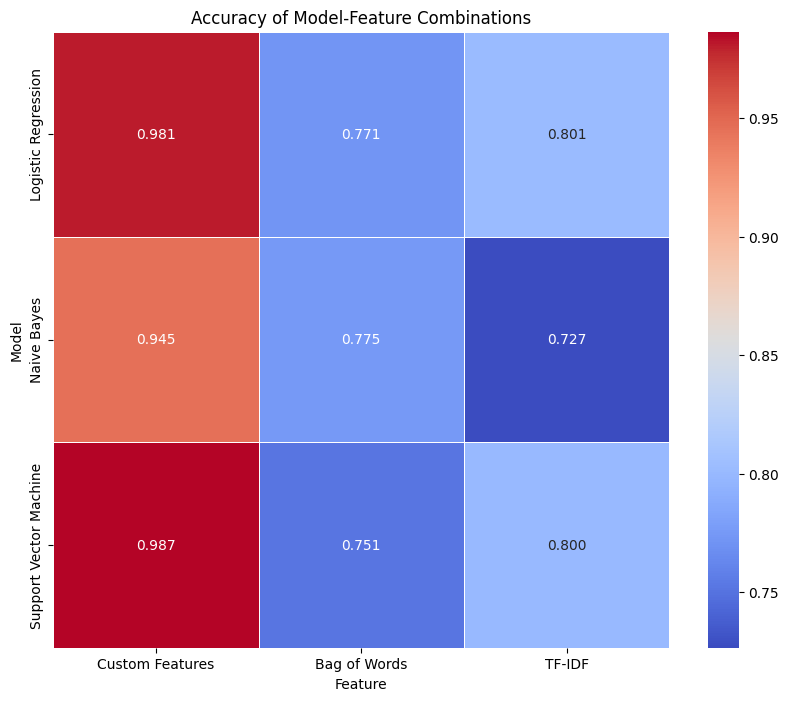

In [16]:
import numpy as np

accuracy_matrix = np.array([
    [lr_cf_accuracy, lr_bow_accuracy, lr_tfidf_accuracy],
    [nb_cf_accuracy, nb_bow_accuracy, nb_tfidf_accuracy],
    [svm_cf_accuracy, svm_bow_accuracy, svm_tfidf_accuracy]
])

import seaborn as sns
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine']
features = ['Custom Features', 'Bag of Words', 'TF-IDF']

plt.figure(figsize=(10, 8))  
sns.heatmap(accuracy_matrix, annot=True, cmap='coolwarm', square=True, 
            linewidths=0.5,  # add a border with a width of 0.5
            xticklabels=features, yticklabels=models,
            fmt=".3f")  # format the annotated values with up to 4 significant digits
plt.xlabel('Feature')
plt.ylabel('Model')
plt.title('Accuracy of Model-Feature Combinations')
plt.show()

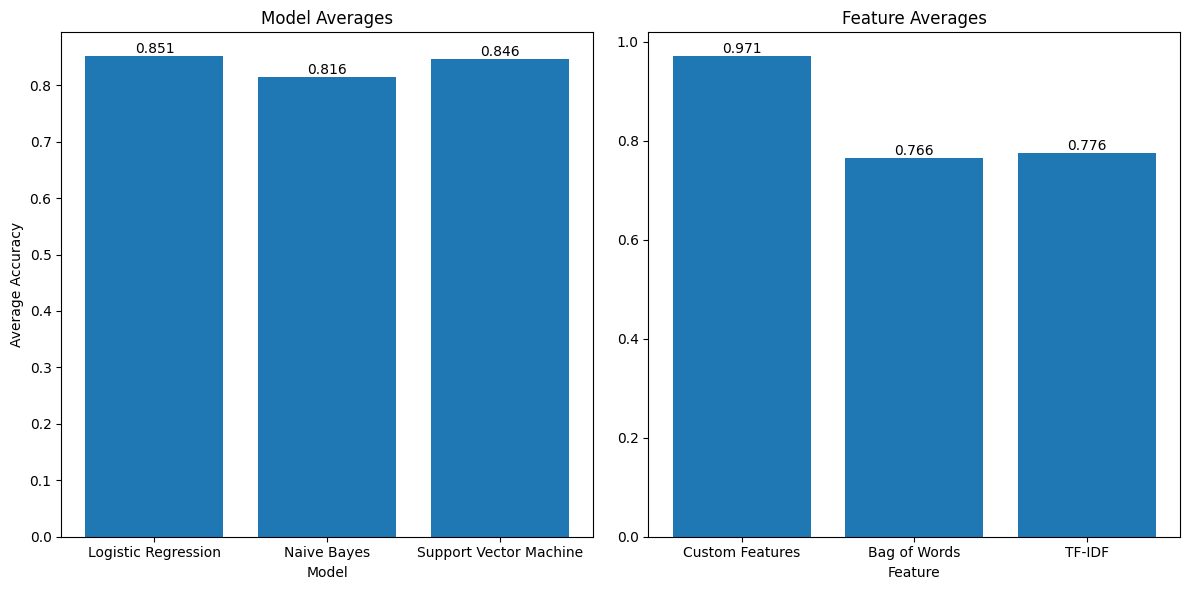

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the accuracy matrix
accuracy_matrix = np.array([
    [lr_cf_accuracy, lr_bow_accuracy, lr_tfidf_accuracy],
    [nb_cf_accuracy, nb_bow_accuracy, nb_tfidf_accuracy],
    [svm_cf_accuracy, svm_bow_accuracy, svm_tfidf_accuracy]
])

models = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine']
features = ['Custom Features', 'Bag of Words', 'TF-IDF']

# Calculate model averages
model_averages = np.mean(accuracy_matrix, axis=1)

# Calculate feature averages
feature_averages = np.mean(accuracy_matrix, axis=0)

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot model averages
axs[0].bar(models, model_averages)
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Average Accuracy')
axs[0].set_title('Model Averages')
for i, avg in enumerate(model_averages):
    axs[0].text(i, avg, f"{avg:.3f}", ha='center', va='bottom')

# Plot feature averages
axs[1].bar(features, feature_averages)
axs[1].set_xlabel('Feature')
axs[1].set_ylabel('')
axs[1].set_title('Feature Averages')
for i, avg in enumerate(feature_averages):
    axs[1].text(i, avg, f"{avg:.3f}", ha='center', va='bottom')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()